# Data Visualization

## Introduction

The data used below are survey results https://docs.google.com/forms/d/1YqZP3Ad6lMBzBrWGZy_z3YL35_obh1nmOuDgmhpYhWU/edit?usp=sharing. The survey was created as part of the course "IT-Organisation and Computer Service Management".
70 people were interviewed about their expectations from the banking service using the SERVQUAL service assessment method. In order to work with the table, it must be loaded on the home page in localhost.

A little about the data with which we will work. The essence of the method is to find out how important certain parameters are for users in each of the 5 categories (tangibles, reliability, responsiveness, assurance, empathy) on a 7-point scale (1 - not important at all, 7 - very important), and then compare the expectations for two groups of people (in my case, men and women. Unfortunately, I did not find representatives of other genders). We will build all kinds of graphs based on the results obtained during the survey.

We can represent this data in completely different ways. It is important to understand what exactly we want to know. Therefore, below are various ways to visualize the data obtained.

All data is recorded in an Excel spreadsheet. To read the table, we will use the xlrd library. (This is not the only library with which you can work with tables, but for me the most convenient).

In [1]:
import xlrd
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
workbook = xlrd.open_workbook("PythonDataVisualization.xlsx")

In [32]:
worksheet1 = workbook.sheet_by_index(0)
#for i in range(0, 36):
#    for j in range(0, 30):
#       print(worksheet1.cell_value(i, j), end='\t')
#    print('')
#from numpy import zeros
Info1 = np.zeros([35, 22])
for i in range(35):
    for j in range(22):
        Info1[i][j] = int(worksheet1.cell_value(i + 1, j + 4))
        
names1 = [0] * 35
for i in range(35):
    names1[i] = worksheet1.cell_value(i + 1, 1)

tangibles1 = [0] * 5
t1_middle = [0] * 5
l = 0
for j in range(4, 9):
    for i in range(1, 36):
        tangibles1[l] += int(worksheet1.cell_value(i, j))
    l += 1
for i in range(5):
    t1_middle[i] = tangibles1[i] / 35
print(t1_middle)

t1 = 0
for i in range(5):
    t1 += t1_middle[i] / 5

reliability1 = [0] * 5
ry1_middle = [0] * 5
l = 0
for j in range(9, 14):
    for i in range(1, 36):
        reliability1[l] += int(worksheet1.cell_value(i, j))
    l += 1
for i in range(5):
    ry1_middle[i] = reliability1[i]/35
print(ry1_middle)

ry1 = 0
for i in range(5):
    ry1 += ry1_middle[i] / 5

    
responsiveness1 = [0] * 4
rs1_middle = [0] * 4
l = 0
for j in range(14, 18):
    for i in range(1, 36):
        responsiveness1[l] += int(worksheet1.cell_value(i, j))
    l += 1
for i in range(4):
    rs1_middle[i] = responsiveness1[i] / 35
print(rs1_middle)

rs1 = 0
for i in range(4):
    rs1 += rs1_middle[i] / 4
    
    
assurance1 = [0] * 4
a1_middle = [0] * 4
l = 0
for j in range(18, 22):
    for i in range(1, 36):
        assurance1[l] += int(worksheet1.cell_value(i, j))
    l += 1
for i in range(4):
    a1_middle[i] = assurance1[i] / 35
print(a1_middle)

a1 = 0
for i in range(4):
    a1 += a1_middle[i] / 4

    
empathy1 = [0] * 4
e1_middle = [0] * 4
l = 0
for j in range(22, 26):
    for i in range(1, 36):
        empathy1[l] += int(worksheet1.cell_value(i, j))
    l += 1
for i in range(4):
    e1_middle[i] = empathy1[i] / 35
print(e1_middle)

e1 = 0
for i in range(4):
    e1 += e1_middle[i] / 4
    
list1 = [t1, ry1, rs1, a1, e1]

[6.142857142857143, 6.685714285714286, 5.914285714285715, 6.314285714285714, 6.0]
[6.257142857142857, 6.0285714285714285, 6.285714285714286, 5.885714285714286, 6.171428571428572]
[6.0285714285714285, 5.8, 6.257142857142857, 6.457142857142857]
[6.542857142857143, 6.114285714285714, 6.257142857142857, 5.885714285714286]
[6.0, 5.9714285714285715, 5.628571428571429, 5.8]


In [3]:
ages1 = [0] * 35
l = 0
for i in range(1, 36):
    ages1[l] = int(worksheet1.cell_value(i, 2))
    l += 1

t_person1 = [0] * 35
for i in range(1, 36):
    for j in range(4, 9):
        t_person1[i-1] += int(worksheet1.cell_value(i, j)) / 5

ry_person1 = [0] * 35
for i in range(1, 36):
    for j in range(9, 14):
        ry_person1[i-1] += int(worksheet1.cell_value(i, j)) / 5
        
rs_person1 = [0] * 35
for i in range(1, 36):
    for j in range(14, 18):
        rs_person1[i-1] += int(worksheet1.cell_value(i, j)) / 4
        
a_person1 = [0] * 35
for i in range(1, 36):
    for j in range(18, 22):
        a_person1[i-1] += int(worksheet1.cell_value(i, j)) / 4
        
e_person1 = [0] * 35
for i in range(1, 36):
    for j in range(22, 26):
        e_person1[i-1] += int(worksheet1.cell_value(i, j)) / 4

In [33]:
worksheet2 = workbook.sheet_by_index(1)
#for i in range(0, 36):
#    for j in range(0, 30):
#       print(worksheet2.cell_value(i, j), end='\t')
#    print('')
Info2 = np.zeros([35, 22])
for i in range(35):
    for j in range(22):
        Info2[i][j] = int(worksheet2.cell_value(i + 1, j + 4))

names2 = [0] * 35
for i in range(35):
    names2[i] = worksheet2.cell_value(i + 1, 1)

tangibles2 = [0]*5
t2_middle = [0]*5
l = 0
for j in range(4, 9):
    for i in range(1, 36):
        tangibles2[l] += int(worksheet2.cell_value(i, j))
    l += 1
for i in range(5):
    t2_middle[i] = tangibles2[i]/35
print(t2_middle)

t2 = 0
for i in range(5):
    t2 += t2_middle[i]/5
    

reliability2 = [0]*5
ry2_middle = [0]*5
l = 0
for j in range(9, 14):
    for i in range(1, 36):
        reliability2[l] += int(worksheet2.cell_value(i, j))
    l += 1
for i in range(5):
    ry2_middle[i] = reliability2[i]/35
print(ry2_middle)

ry2 = 0
for i in range(5):
    ry2 += ry2_middle[i]/5
    
    
responsiveness2 = [0]*4
rs2_middle = [0]*4
l = 0
for j in range(14, 18):
    for i in range(1, 36):
        responsiveness2[l] += int(worksheet2.cell_value(i, j))
    l += 1
for i in range(4):
    rs2_middle[i] = responsiveness2[i]/35
print(rs2_middle)

rs2 = 0
for i in range(4):
    rs2 += rs2_middle[i]/4
    
    
assurance2 = [0]*4
a2_middle = [0]*4
l = 0
for j in range(18, 22):
    for i in range(1, 36):
        assurance2[l] += int(worksheet2.cell_value(i, j))
    l += 1
for i in range(4):
    a2_middle[i] = assurance2[i]/35
print(a2_middle)

a2 = 0
for i in range(4):
    a2 += a2_middle[i]/4

    
empathy2 = [0]*4
e2_middle = [0]*4
l = 0
for j in range(22, 26):
    for i in range(1, 36):
        empathy2[l] += int(worksheet2.cell_value(i, j))
    l += 1
for i in range(4):
    e2_middle[i] = empathy2[i]/35
print(e2_middle)

e2 = 0
for i in range(4):
    e2 += e2_middle[i] / 4
    
list2 = [t2, ry2, rs2, a2, e2]

[5.885714285714286, 6.6, 5.571428571428571, 5.3428571428571425, 5.885714285714286]
[6.0, 6.371428571428571, 6.0, 6.314285714285714, 6.0]
[6.114285714285714, 5.428571428571429, 6.371428571428571, 6.228571428571429]
[6.3428571428571425, 6.085714285714285, 5.9714285714285715, 5.3428571428571425]
[5.3428571428571425, 5.771428571428571, 5.314285714285714, 5.114285714285714]


In [5]:
ages2 = [0] * 35
l = 0
for i in range(1, 36):
    ages2[l] = int(worksheet2.cell_value(i, 2))
    l += 1

t_person2 = [0] * 35
for i in range(1, 36):
    for j in range(4, 9):
        t_person2[i-1] += int(worksheet2.cell_value(i, j)) / 5

ry_person2 = [0] * 35
for i in range(1, 36):
    for j in range(9, 14):
        ry_person2[i-1] += int(worksheet2.cell_value(i, j)) / 5
        
rs_person2 = [0] * 35
for i in range(1, 36):
    for j in range(14, 18):
        rs_person2[i-1] += int(worksheet2.cell_value(i, j)) / 4
        
a_person2 = [0] * 35
for i in range(1, 36):
    for j in range(18, 22):
        a_person2[i-1] += int(worksheet2.cell_value(i, j)) / 4
        
e_person2 = [0] * 35
for i in range(1, 36):
    for j in range(22, 26):
        e_person2[i-1] += int(worksheet2.cell_value(i, j)) / 4

In [6]:
Matrix = [[t1, ry1, rs1, a1, e1],
          [t2, ry2, rs2, a2, e2],
          [(t1 + t2) / 2, (ry1 + ry2) / 2, (rs1 + rs2) / 2, (a1 + a2) / 2, (e1 + e2) / 2]]

person = [0] * 35
for i in range(1, 36):
    person[i-1] = i

## Bar Plots

Bar charts clearly show the difference between categories. In principle, depending on what information we want to compare, we can simply form groups in different ways and get the necessary information.
Let's consider three types of column charts - regular, compound and grouped.

### Regular Bar Plots

The data presented is the average value for each of the 5 parameters in the group of interviewed women and men. According to these graphs, one can understand how important each of the parameters is within each surveyed group.

In [7]:
def RegularBarPlot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    ax.bar(x_data, y_data, color = '#808000', align = 'center')
    
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

### Compound Bar Plots

The data presented is the average value for each of the 5 parameters in the group of interviewed women and men. The data is displayed as follows: the upper bound of one parameter is the lower bound of another. According to this graph, you can understand how important each of the parameters is for all respondents.

In [8]:
def CompoundBarPlot(x_data, y_data_list, colors, y_data_names="", x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    top = y_data_list[0]
    for i in range(0, len(y_data_list)): #one category at a time
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            #for every category the bottom of the bar is the top of the last category
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = top, align = 'center', label = y_data_names[i])
            for j in range(0, len(x_data)):
                top[j] += y_data_list[i][j]
    
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')

### Grouped Bar Plot

The data presented is the average value for each of the 5 parameters in the group of interviewed women and men. The corresponding parameters are displayed together (ie the average value for parameter 1 in the group of women and the average value of parameter 2 in the group of men). According to this graph, you can understand for which group each of the parameters is more significant and by how much. In other words, we can compare two groups within each of the parameters.

In [9]:
def GroupedBarPlot(x_data, y_data_list, colors, y_data_names="", x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    total_width = 0.8
    ind_width = total_width / len(y_data_list)
    alteration = np.arange(-(total_width/4), total_width/2, ind_width) #the centers of each bar

    for i in range(0, len(y_data_list)):
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width) #move the bar so it doesn't overlap another bar
   
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'lower right')

### Graphs  

In [10]:
Matrix = [[t1, ry1, rs1, a1, e1],
          [t2, ry2, rs2, a2, e2],
          [(t1 + t2) / 2, (ry1 + ry2) / 2, (rs1 + rs2) / 2, (a1 + a2) / 2, (e1 + e2) / 2]]

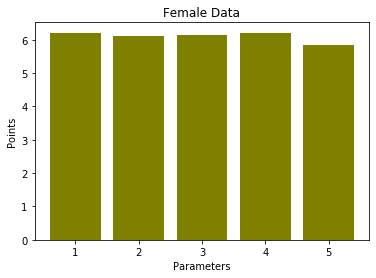

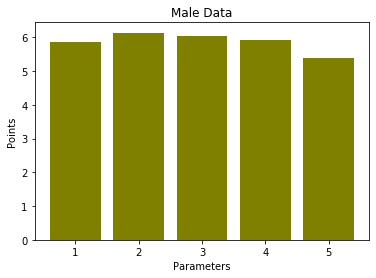

In [11]:
RegularBarPlot([1, 2, 3, 4, 5], list1, "Parameters", "Points", 'Female Data')
RegularBarPlot([1, 2, 3, 4, 5], list2, "Parameters", "Points", 'Male Data')

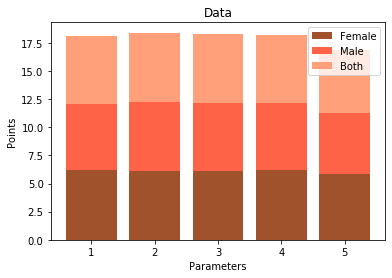

In [12]:
Matrix = [[t1, ry1, rs1, a1, e1],
          [t2, ry2, rs2, a2, e2],
          [(t1 + t2) / 2, (ry1 + ry2) / 2, (rs1 + rs2) / 2, (a1 + a2) / 2, (e1 + e2) / 2]]

CompoundBarPlot([1, 2, 3, 4, 5], Matrix, ["#A0522D", "#FF6347", "#FFA07A"], ["Female", "Male", "Both"], "Parameters", "Points", "Data")

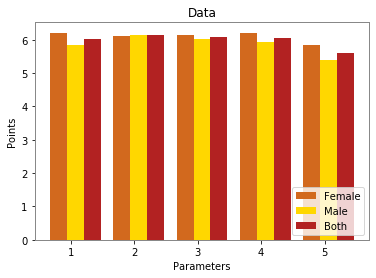

In [44]:
Matrix = [[t1, ry1, rs1, a1, e1],
          [t2, ry2, rs2, a2, e2],
          [(t1 + t2) / 2, (ry1 + ry2) / 2, (rs1 + rs2) / 2, (a1 + a2) / 2, (e1 + e2) / 2]]

GroupedBarPlot([1, 2, 3, 4, 5], Matrix, ["#D2691E", "#FFD700", '#B22222'], ["Female", "Male", "Both"], "Parameters", "Points", "Data")

## Line Plots

Line plots are used when one variable is highly dependent on another. Line graphs show the covariance of two variables.

In [14]:
def LinePlot(x_data, y_data_list, colors, y_data_names="", x_label="", y_label="", title=""):
    _, ax = plt.subplots()

    for i in range(0, len(y_data_list)):
        ax.plot(x_data, y_data_list[i], lw = 1, color = colors[i], label = y_data_names[i], alpha = 1)
    

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(loc = 'lower right')

### Graphs

In our case, the use of line graphs can only make sense if we compare how important all 5 parameters are for each person from one of the two groups. Below are the graphs separately for women and for men; Using this method of data visualization, it is impossible to compare data obtained in different groups, because there are no covariances of variables.

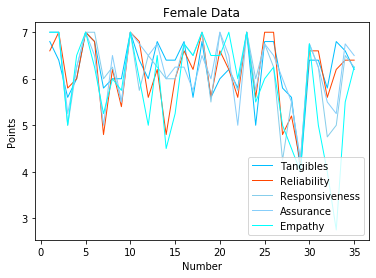

In [15]:
colors = ["#00BFFF", "#FF4500", "#87CEEB", "#87CEFA", "#00FFFF"]
LinePlot(person, [t_person1, ry_person1, rs_person1, a_person1, e_person1,], colors, ["Tangibles", "Reliability", "Responsiveness", "Assurance", "Empathy"], "Number", "Points", "Female Data")

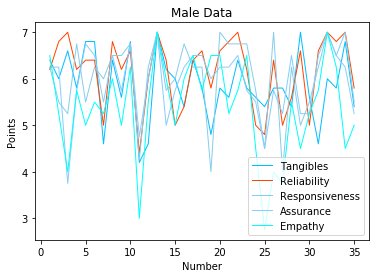

In [16]:
colors = ["#00BFFF", "#FF4500", "#87CEEB", "#87CEFA", "#00FFFF"]
LinePlot(person, [t_person2, ry_person2, rs_person2, a_person2, e_person2,], colors, ["Tangibles", "Reliability", "Responsiveness", "Assurance", "Empathy"], "Number", "Points", "Male Data")

## Radial Chart

The radial chart is useful when we want to compare the parameters of the same entity. Here we will compare the average value of the importance of each of the parameters for two groups of people.

In [17]:
def RadialChart(values1, values2, values3, parameters, legend1="", legend2="", legend3=""):
    x_as1 = [n / float(len(parameters)) * 2 * pi for n in range(len(parameters))]
    x_as2 = [n / float(len(parameters)) * 2 * pi for n in range(len(parameters))]
    x_as3 = [n / float(len(parameters)) * 2 * pi for n in range(len(parameters))]

    values1 += values1[:1]
    x_as1 += x_as1[:1]
    values2 += values2[:1]
    x_as2 += x_as2[:1]
    values3 += values3[:1]
    x_as3 += x_as3[:1]

    plt.rc('axes', linewidth=1, edgecolor="#888888")

    ax = plt.subplot(111, polar=True)
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    plt.xticks(x_as1[:-1], [])
    plt.xticks(x_as2[:-1], [])
    plt.xticks(x_as3[:-1], [])

    plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], ["0", "1", "2", "3", "4", "5", "6", "7"])

    ax.plot(x_as1, values1, label = legend1, linewidth=2, linestyle='solid', zorder=4)
    ax.plot(x_as2, values2, label = legend2, linewidth=2, linestyle='solid', zorder=4)
    ax.plot(x_as3, values3, label = legend3, linewidth=2, linestyle='solid', zorder=4)

    plt.ylim(0, 7)

    for i in range(len(parameters)):
        angle_rad = i / float(len(parameters)) * 2 * pi

        if angle_rad == 0:
            ha, distance_ax = "center", 1
        elif 0 < angle_rad < pi:
                ha, distance_ax = "left", 1
        elif angle_rad == pi:
            ha, distance_ax = "center", 1
        else:
            ha, distance_ax = "right", 1

        ax.text(angle_rad, 8 + distance_ax, parameters[i], size=10, horizontalalignment=ha, verticalalignment="center")
    
    ax.legend(loc = 'best')

    plt.show()

### Graph

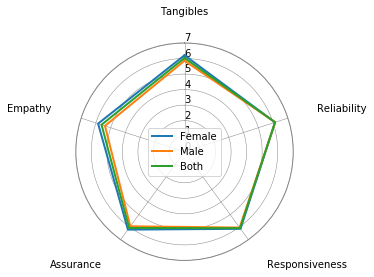

In [18]:
parameters = ["Tangibles", "Reliability", "Responsiveness", "Assurance", "Empathy"]
values1 = [t1, ry1, rs1, a1, e1]
values2 = [t2, ry2, rs2, a2, e2]
values3 = [(t1 + t2) / 2, (ry1 + ry2) / 2, (rs1 + rs2) / 2, (a1 + a2) / 2, (e1 + e2) / 2]
RadialChart(values1, values2, values3, parameters, "Female", "Male", "Both")

## Histograms

Histograms are useful for representing the distribution of data. Of course, this type of plot is most useful for the probability density distribution. However, we will use this type of graph to look at the distribution of the ages of the survey participants.

In [19]:
def Histogram(data1, data2, n_bins = 0, data1_name="", data1_color="", data2_name="", data2_color="", x_label="", y_label="", title=""):
    max_nbins = 10
    data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins


    if n_bins == 0:
        bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)
    else: 
        bins = n_bins

    _, ax = plt.subplots()
    ax.hist(data1, bins = bins, color = data1_color, alpha = 1, label = data1_name)
    ax.hist(data2, bins = bins, color = data2_color, alpha = 0.5, label = data2_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')

### Graph 

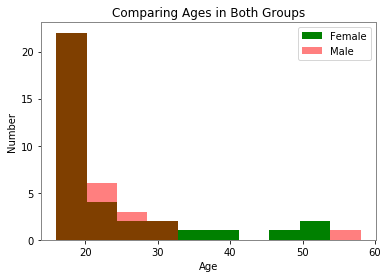

In [20]:
Histogram(ages1, ages2, 0, "Female", "g", "Male", "r", "Age", "Number", "Comparing Ages in Both Groups")

## Heatmap

A heatmap is a matrix representation of data in which each value is shown in a specific color. Each value has its own color and the index matrix compares 2 elements or their properties. Heatmaps show the relationship of multiple variables to each other by displaying their values as specific colors.

I made a heatmap showing how Female and Male answered all the questions.

### Female Data

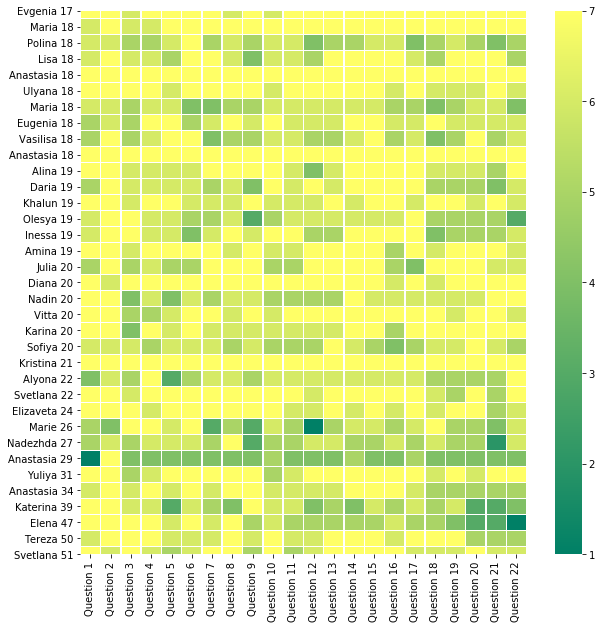

In [41]:
person = [0] * 35
for i in range(35):
    person[i] = names1[i] + " " + str(ages1[i])
    
question = [0] * 22
for i in range(1, 23):
    question[i-1] = "Question " + str(i)
    
data1 = pd.DataFrame(Info1, person)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(data1, cmap='summer', linewidths=0.5, xticklabels=question, yticklabels = person)

### Male Data 

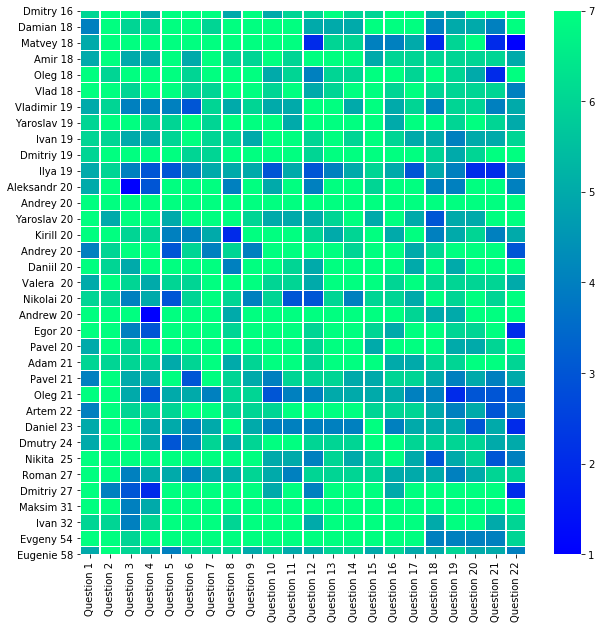

In [43]:
person = [0] * 35
for i in range(35):
    person[i] = names2[i] + " " + str(ages2[i])
    
question = [0] * 22
for i in range(1, 23):
    question[i-1] = "Question " + str(i)
    
data2 = pd.DataFrame(Info2, person)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(data2, cmap='winter', linewidths=0.5, xticklabels=question, yticklabels = person)